In [1]:
import numpy as np
import pandas as pd
import math
import itertools
from sklearn.metrics import DistanceMetric
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist
import networkx as nx
from numpy import inf
import random
from scipy import linalg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist #Calculates pairwise distance

In [2]:
'equation for adjacency'

def equation(df, sigma, distance):
    dim = df.shape[0]
    A = np.zeros([dim, dim])
    dist = iter(pdist(df, metric=distance))
#     matrix_dist = dist.pairwise(df.to_numpy())
    for i in range(dim):
        for j in range(i+1, dim):  
            d = np.exp(-next(dist) ** 2) / (2. * sigma ** 2)
            A[i,j] = d
            A[j,i] = d
    return A


In [3]:
def CSVToGraphAndAdjecency(csv) :
    
    # Uploading the file
    file=open(csv)
    df = pd.read_csv(file)
    
    # Original dataset
    print('original dataset:')
    print(df.head())
    
    # Converting to categorized type of DataFrame
    df = convert(df, 2,12)
    df_cluster = df.iloc[:,0:11]
    
    # Converted dataset
    print('converted dataset:')
    print(df_cluster.head())
    
    # Creating a distance matrix and Graph
    dist = DistanceMetric.get_metric('euclidean')
    matrix_dist = dist.pairwise(df_cluster.to_numpy())
    Graph=nx.from_numpy_matrix(matrix_dist)
    draw_graph(Graph)
    
    # Distance matrix
    print('distance matrix:')
    print(matrix_dist)
    
    # Creating an adjecency matrix
    adjacency_matrix = equation(df_cluster, 0.3, 'euclidean')
    
    # Adjacency matrix
    print('adjacency matrix:')
    print(adjacency_matrix)
    
    return df, df_cluster, matrix_dist, adjacency_matrix, Graph

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

original dataset:
    Age  Temperature Sex Diarrhea    Fever Coughing ShortnessOfBreath  \
0  67.0        38.11   F  unknown      Yes      Yes           unknown   
1  29.0         0.00   M  unknown  unknown  unknown           unknown   
2  22.0         0.00   F  unknown  unknown  unknown           unknown   
3  20.0        36.56   F  unknown      Yes      Yes           unknown   
4  21.0         0.00   M  unknown  unknown  unknown           unknown   

  SoreThroat NauseaVomitting  Fatigue   Cancer Diagnosis  
0         No         unknown       No  unknown      H1N1  
1    unknown         unknown  unknown  unknown      H1N1  
2    unknown         unknown  unknown  unknown      H1N1  
3         No         unknown      Yes  unknown      H1N1  
4    unknown         unknown  unknown  unknown      H1N1  
converted dataset:
    Age  Temperature  Sex  Diarrhea  Fever  Coughing  ShortnessOfBreath  \
0  67.0        38.11    0         2      1         1                  2   
1  29.0         0.00

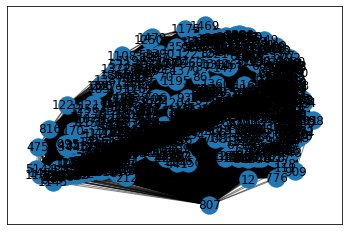

In [6]:
csv="Flu_Classification.csv"
df, df_cluster, matrix_dist, adjacency_matrix, Graph = CSVToGraphAndAdjecency(csv)

In [7]:
# Creating Degree Matrix, Laplacian Matrix, printing the eigenvalues and eigenvectors

def bigFucntion(G, adj_matrix) :
    
    degrees = [val for (node, val) in G.degree()]
    
    # Degree matrix
    D = np.zeros((len(degrees), len(degrees)))
    np.fill_diagonal(D, degrees)
    print('degree matrix:')
    print(D)
    
    # laplacian matrix
    L = D - adj_matrix
    print('laplacian matrix:')
    print(L)
    
    # Normalised laplacian matrix
    D_half = linalg.fractional_matrix_power(D, -0.5)
    LN = np.matmul(np.matmul(D_half, L), D_half)
#     LN = np.power(D,-0.5)* L* np.power(D,-0.5)
    print('normalised laplacian matrix:')
    print(LN)
    
    # Eigenvalues and Eigenvectors
    e, v = np.linalg.eig(LN)
    e = e.real
    v = v.real
    
    print('eigenvalues:')
    print(e)
    
    print('eigenvectors:')
    print(v)
    
    return D, L, LN, e, v

In [8]:
DegreeMatrix, LaplacianMatrix, NormalizedLaplacianMatrix, e, v = bigFucntion(Graph, adjacency_matrix)

degree matrix:
[[1484.    0.    0. ...    0.    0.    0.]
 [   0. 1483.    0. ...    0.    0.    0.]
 [   0.    0. 1483. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1484.    0.    0.]
 [   0.    0.    0. ...    0. 1484.    0.]
 [   0.    0.    0. ...    0.    0. 1484.]]
laplacian matrix:
[[ 1.48400000e+003  0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  1.48300000e+003 -1.07152769e-021 ... -5.33781166e-294
  -7.52283997e-272 -3.70383888e-230]
 [ 0.00000000e+000 -1.07152769e-021  1.48300000e+003 ... -1.68749152e-158
  -1.97759534e-142 -6.73228046e-113]
 ...
 [ 0.00000000e+000 -5.33781166e-294 -1.68749152e-158 ...  1.48400000e+003
  -2.04377467e+000 -6.85610023e-004]
 [ 0.00000000e+000 -7.52283997e-272 -1.97759534e-142 ... -2.04377467e+000
   1.48400000e+003 -1.01753549e-001]
 [ 0.00000000e+000 -3.70383888e-230 -6.73228046e-113 ... -6.85610023e-004
  -1.01753549e-001  1.48400000e+003]]
normalised laplacian matrix:
[[

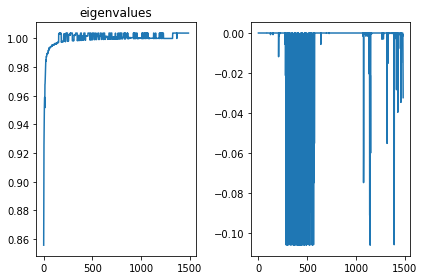

In [9]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < np.amax(e))[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [13]:
# finding optimal number of clusters using Silhouette_score

def findClusters(df):
    #Use silhouette score
    range_n_clusters = list (range(2,10))
    thisdict = {}
    for n_clusters in range_n_clusters:
        clusterer = KMeans (n_clusters=n_clusters).fit(df)
        preds = clusterer.predict(df)
        centers = clusterer.cluster_centers_
        score = [silhouette_score (df, preds)]   
        thisdict[n_clusters] = [score]
       
    
    maxValue = max(thisdict, key = (lambda k: thisdict[k]))
    return thisdict, maxValue

In [14]:
thisdict, maxValue = findClusters(df_cluster)
print(maxValue)

6


In [15]:
thisdict

{2: [[0.497731987087321]],
 3: [[0.5543765188392608]],
 4: [[0.6017671571323195]],
 5: [[0.606371342103899]],
 6: [[0.6272428554295735]],
 7: [[0.6180585843318745]],
 8: [[0.6091437847893568]],
 9: [[0.5879925259024924]]}

In [16]:

U = np.array(v[:, i[0]]).reshape(-1, 1)
km = KMeans(init='k-means++', n_clusters=maxValue)
df['clusters'] = km.fit_predict(U)
df

,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis,clusters
0,67.00,38.11,0,2,1,1,2,0,2,0,1,1,1
1,29.00,0.00,1,2,2,2,2,2,2,2,1,1,1
2,22.00,0.00,0,2,2,2,2,2,2,2,1,1,1
3,20.00,36.56,0,2,1,1,2,0,2,1,1,1,1
4,21.00,0.00,1,2,2,2,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1.40,0.00,2,2,2,2,2,2,2,2,1,0,1
1481,0.83,0.00,2,2,2,2,2,2,2,2,1,0,1
1482,3.00,0.00,2,2,2,2,2,2,2,2,1,0,3
1483,4.00,0.00,2,2,2,2,2,2,2,2,1,0,3
